In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.metrics import roc_curve, auc
from sklearn.metrics.pairwise import pairwise_distances
from collections import Counter
import random
import csv

In [2]:
## load training and testing imageset
train_image_path = "data/train-images.idx3-ubyte"
test_image_path = "data/t10k-images.idx3-ubyte"

train_buffer = open(train_image_path, 'rb').read()
test_buffer = open(test_image_path, 'rb').read()

# load head=(magic number, number of images, rows, columns)
train_head = struct.unpack_from('>IIII', train_buffer, 0)
test_head = struct.unpack_from('>IIII', test_buffer, 0)

offset = struct.calcsize('>IIII')
train_fmt = '>' + str(train_head[1] * train_head[2] * train_head[3]) + 'B'
test_fmt = '>' + str(test_head[1] * test_head[2] * test_head[3]) + 'B'

# load images
train_imgs = struct.unpack_from(train_fmt, train_buffer, offset)
test_imgs = struct.unpack_from(test_fmt, test_buffer, offset)

train_imgs = np.reshape(train_imgs, [train_head[1], train_head[2] * train_head[3]])
test_imgs = np.reshape(test_imgs, [test_head[1], test_head[2] * test_head[3]])
print(np.shape(train_imgs))
print(np.shape(test_imgs))
# print(train_head)
# print(type(train_imgs))
# print(train_imgs)
# print(np.reshape(train_imgs[1,:], [28,28]))

(60000, 784)
(10000, 784)


In [3]:
## load training and testing labelset
train_label_path = "data/train-labels.idx1-ubyte"
test_label_path = "data/t10k-labels.idx1-ubyte"

train_buffer = open(train_label_path, 'rb').read()
test_buffer = open(test_label_path, 'rb').read()

# load head=(magic number, number of items)
train_head = struct.unpack_from('>II', train_buffer, 0)
test_head = struct.unpack_from('>II', test_buffer, 0)

offset = struct.calcsize('>II')
train_fmt = '>' + str(train_head[1]) + 'B'
test_fmt = '>' + str(test_head[1]) + 'B'

# load labels
train_labels = struct.unpack_from(train_fmt, train_buffer, offset)
test_labels = struct.unpack_from(test_fmt, test_buffer, offset)

train_labels = np.reshape(train_labels, [train_head[1]])
test_labels = np.reshape(test_labels, [test_head[1]])

# print(train_head)
# print(type(train_labels))
# print(train_labels)

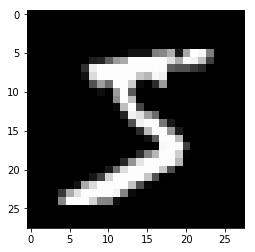

In [4]:
## display test 
fig = plt.figure()
plt.imshow(np.reshape(train_imgs[0,:], [28,28]), cmap='gray')
plt.show()
plt.close()

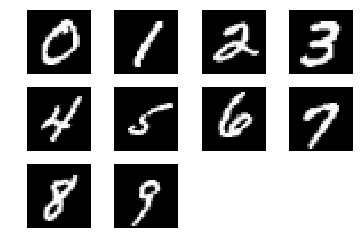

In [5]:
## 1b - display one of each digit
plt_ind = []
i = 0
cnt = 0
for label in train_labels:
    if i == label:
        plt_ind.append(cnt)
        i = i + 1
        if i == 10:
            break
        pass
    pass
    cnt = cnt + 1
# print(plt_ind)
fig = plt.figure()
for i in range(0, 10):
    fig.add_subplot(3,4,1+i)
    plt.axis('off')
    plt.imshow(np.reshape(train_imgs[plt_ind[i],:], [28,28]), cmap='gray')
# plt.savefig("1b.jpg")
plt.show()
plt.close()

In [6]:
## 1c - display normalized histogram of digit counts
fig = plt.figure()
sns.distplot(train_labels, norm_hist = True)
# plt.savefig("1c.jpg")
plt.close()

D:\software\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


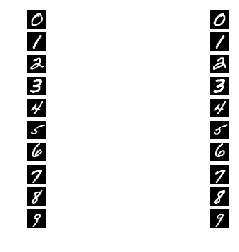

[1020.6473436011089, 419.583126448145, 1454.2867667691953, 1123.1179813358879, 770.2194492480699, 1066.1097504478607, 1051.5441027365423, 880.9273522828089, 1121.4499543002353, 801.0855135377246]


In [7]:
## 1d - best match
fig = plt.figure()
best_match_L2 = []
cnt = 0
for i in plt_ind:
    sample = train_imgs[i,:]
    L2_vector = np.linalg.norm(train_imgs - sample, ord=2, axis=1)
    L2_vector[i] = sys.maxsize
    best_match_id = np.argmin(L2_vector)
    best_match_L2.append(L2_vector[best_match_id])
    fig.add_subplot(10,2,cnt*2+1)
    plt.axis('off')
    plt.imshow(np.reshape(train_imgs[i,:], [28,28]), cmap='gray')
    fig.add_subplot(10,2,cnt*2+2)
    plt.axis('off')
    plt.imshow(np.reshape(train_imgs[best_match_id,:], [28,28]), cmap='gray')
    cnt = cnt + 1
# plt.savefig("1d.jpg")
plt.show()
plt.close()
print(best_match_L2)

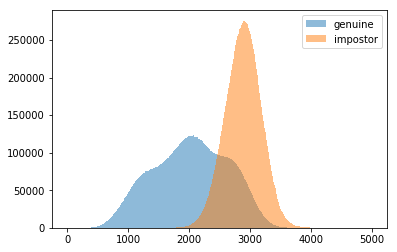

In [8]:
## 1e
# find index of 0 and 1
indexs_0 = np.argwhere(train_labels == 0)
indexs_1 = np.argwhere(train_labels == 1)
train_imgs_0 = train_imgs[indexs_0,:]
train_imgs_0 = np.reshape(train_imgs_0, [np.shape(train_imgs_0)[0], np.shape(train_imgs_0)[2]])
train_imgs_1 = train_imgs[indexs_1,:]
train_imgs_1 = np.reshape(train_imgs_1, [np.shape(train_imgs_1)[0], np.shape(train_imgs_1)[2]])

dist0 = pairwise_distances(train_imgs_0, metric='euclidean')
dist1 = pairwise_distances(train_imgs_1, metric='euclidean')
dist01 = pairwise_distances(train_imgs_0, train_imgs_1, metric='euclidean')

tmp0 = np.triu_indices(np.shape(dist0)[0],1)
tmp1 = np.triu_indices(np.shape(dist1)[0],1)
dist_genuine = np.append(dist0[tmp0], dist1[tmp1])
dist_impostor = np.reshape(dist01, [np.shape(dist01)[0] * np.shape(dist01)[1]])

bins = np.linspace(0, 5000, 1000)
plt.hist(dist_genuine, bins, alpha=0.5, label = 'genuine')
plt.hist(dist_impostor, bins, alpha=0.5, label = 'impostor')
plt.legend(loc='upper right')
# plt.savefig("1e.jpg")
plt.show()


In [11]:
## 1f
y_labels = np.append(np.zeros(np.shape(dist_genuine)[0]), np.ones(np.shape(dist_impostor)[0]))
y_score = np.append(dist_genuine, dist_impostor)
# print(np.shape(y_labels))
# print(np.shape(y_score))
fpr,tpr,threshold = roc_curve(y_labels, y_score)
roc_auc = auc(fpr,tpr)
print("AUC: " + str(roc_auc))
fnr = 1 - tpr
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print("EER: " + str(EER))
print("EER2: " + str(EER2))

# plt.figure()
# plt.figure(figsize=(10,10))
# plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.legend(loc="lower right")
# #plt.savefig("1f.jpg")
# plt.show()


AUC: 0.8941213517035006
EER: 0.18898105539642254
EER2: 0.18898102630549984


In [4]:
## 1g - KNN
def kNN_classifier(trainset, trainlabels, k, testset):
    #print("begin kNN")
    result = []
    dist = pairwise_distances(trainset, testset, metric='euclidean')
    #print(np.shape(dist))
    # calculate the label for each test sample
    for j in range(np.shape(testset)[0]):
        kNearst_ids = np.argsort(dist[:,j])[:k]
        # print(kNearst_ids)
        kNearst_labels = trainlabels[kNearst_ids]
        # print(kNearst_labels)
        result.append(Counter(kNearst_labels).most_common(1)[0][0])
#     part_size = 10000
#     for part in range(int(np.shape(testset)[0] / part_size)):
#         testset_part = testset[range(part_size * part, part_size * part + part_size),:]
#         dist = pairwise_distances(trainset, testset_part, metric='euclidean')
#         #print(np.shape(dist))
#         # calculate the label for each test sample
#         for j in range(np.shape(testset_part)[0]):
#             kNearst_ids = np.argsort(dist[:,j])[:k]
#             # print(kNearst_ids)
#             kNearst_labels = trainlabels[kNearst_ids]
#             # print(kNearst_labels)
#             result.append(Counter(kNearst_labels).most_common(1)[0][0])
#     if part_size * part + part_size < np.shape(testset)[0]:
#         testset_part = testset[range(part_size * part + part_size,np.shape(testset)[0]),:]
#         dist = pairwise_distances(trainset, testset_part, metric='euclidean')
#         #print(np.shape(dist))
#         # calculate the label for each test sample
#         for j in range(np.shape(testset_part)[0]):
#             kNearst_ids = np.argsort(dist[:,j])[:k]
#             # print(kNearst_ids)
#             kNearst_labels = trainlabels[kNearst_ids]
#             # print(kNearst_labels)
#             result.append(Counter(kNearst_labels).most_common(1)[0][0])
    return result

li = list(range(60000))
random.shuffle(li)

for k in range(1,10):
    plabels = kNN_classifier(train_imgs[li[:30000],:], train_labels[li[:30000]], k, train_imgs[li[30000:60000],:])
    rlabels = train_labels[li[30000:60000]]
    diff = plabels - rlabels
    aver_acc = np.sum(diff == 0) / len(diff)
    print("(k,aver_acc): " + str(k) + ',' + str(aver_acc))

(k,aver_acc): 1,0.9672
(k,aver_acc): 2,0.9672


KeyboardInterrupt: 

In [5]:
## 1i - confusion matrix
confusion_matrix = np.zeros([10,10], dtype=int)
for i in range(10):
    index = np.argwhere(rlabels == i)
    for j in range(10):
        confusion_matrix[i][j] = np.sum(np.array(plabels)[index] == j)
print(confusion_matrix)


NameError: name 'rlabels' is not defined

In [26]:
# 1j - train & test all
trainset = np.loadtxt(open("data/train.csv","rb"),delimiter=",",skiprows=1) 
testset = np.loadtxt(open("data/test.csv","rb"),delimiter=",",skiprows=1)
trainlabels = trainset[:,0]
trainset = trainset[:,1:]

In [27]:
plabels = kNN_classifier(trainset, train_labels, 3, testset[:14000,:])

In [28]:
print(plabels)

[8, 8, 9, 8, 6, 0, 7, 8, 7, 9, 9, 2, 9, 3, 7, 8, 6, 7, 7, 2, 1, 9, 5, 8, 6, 7, 2, 2, 0, 1, 5, 0, 0, 4, 2, 1, 0, 9, 7, 9, 3, 3, 8, 6, 1, 5, 8, 2, 4, 6, 1, 0, 3, 0, 9, 4, 2, 3, 9, 4, 5, 3, 3, 1, 1, 8, 4, 6, 9, 3, 9, 9, 1, 7, 8, 3, 5, 1, 0, 5, 2, 1, 4, 4, 3, 8, 4, 7, 9, 1, 9, 0, 3, 0, 5, 7, 1, 7, 8, 6, 1, 6, 5, 8, 2, 4, 9, 0, 5, 3, 3, 3, 9, 9, 2, 0, 4, 1, 8, 2, 6, 9, 8, 4, 6, 1, 0, 0, 8, 7, 9, 6, 6, 2, 8, 0, 9, 4, 5, 6, 7, 9, 5, 9, 4, 4, 1, 0, 5, 5, 2, 2, 3, 9, 5, 9, 9, 5, 2, 0, 2, 0, 0, 3, 2, 1, 4, 6, 4, 7, 5, 1, 9, 1, 9, 1, 5, 7, 2, 6, 8, 0, 3, 7, 6, 6, 1, 9, 6, 2, 6, 7, 6, 2, 4, 5, 9, 8, 3, 7, 7, 5, 1, 9, 2, 9, 6, 1, 1, 2, 5, 6, 4, 2, 8, 8, 2, 0, 3, 5, 1, 0, 4, 8, 2, 3, 5, 4, 8, 1, 6, 2, 5, 7, 3, 2, 8, 2, 1, 4, 3, 5, 5, 7, 9, 6, 4, 9, 0, 7, 0, 7, 1, 1, 4, 7, 7, 4, 9, 2, 9, 1, 4, 6, 8, 7, 1, 5, 7, 4, 1, 3, 0, 6, 0, 1, 6, 1, 6, 3, 1, 1, 8, 5, 1, 7, 6, 1, 3, 1, 0, 3, 2, 2, 4, 1, 5, 2, 0, 2, 5, 2, 1, 1, 9, 7, 4, 6, 0, 4, 0, 9, 3, 8, 7, 9, 4, 7, 3, 1, 1, 4, 7, 3, 0, 4, 5, 1, 4, 0, 2, 3, 5, 

In [57]:
print(np.shape(plabels))

(28000,)


In [ ]:
diff = plabels - testlabels
aver_acc = np.sum(diff == 0) / len(diff)

# write result into result.csv
plabels = np.reshape(plabels, [len(plabels),1])
ImgId = np.reshape(range(1,len(plabels)+1), [len(plabels),1])
result = np.concatenate((ImgId, plabels), axis = 1)
with open("result.csv","w",newline='') as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["ImageId","Label"])
    writer.writerows(result)